In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
import plotly.express as px
from pyoso import Client

import warnings 
warnings.filterwarnings('ignore') 

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

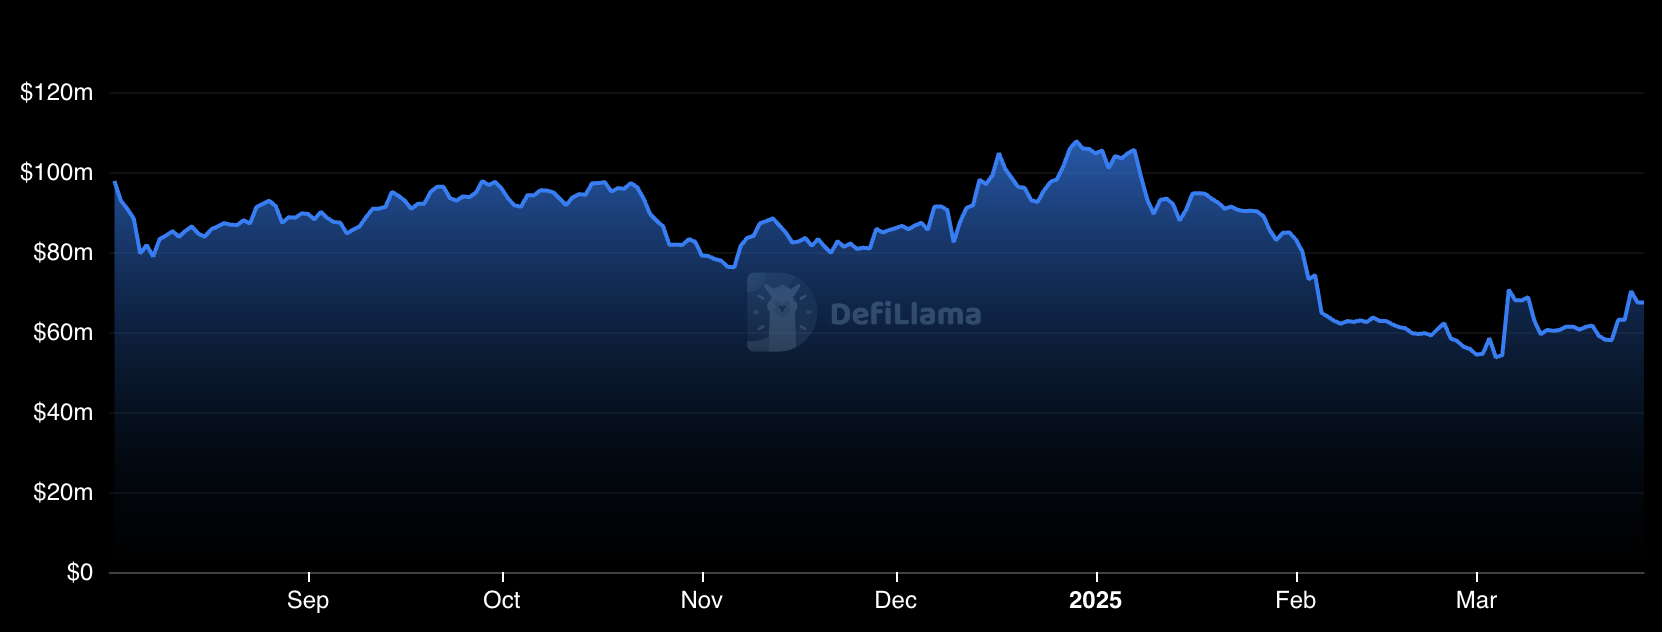

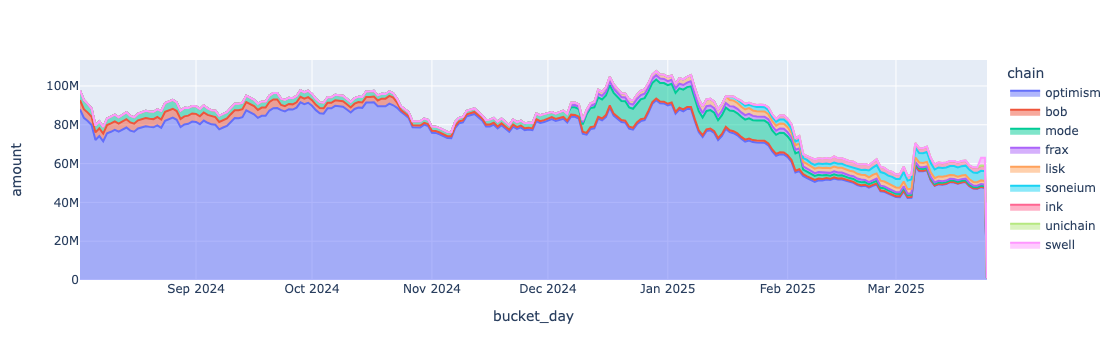

In [6]:
df_staging = client.to_pandas("""
select
    time as bucket_day,
    chain,
    sum(tvl) as amount
from stg__defillama_tvl_events
where
    parent_protocol = 'velodrome'
    and time > DATE('2024-08-01')
group by 1,2
order by 1
""")
px.area(df_staging, x='bucket_day', y='amount', color='chain')

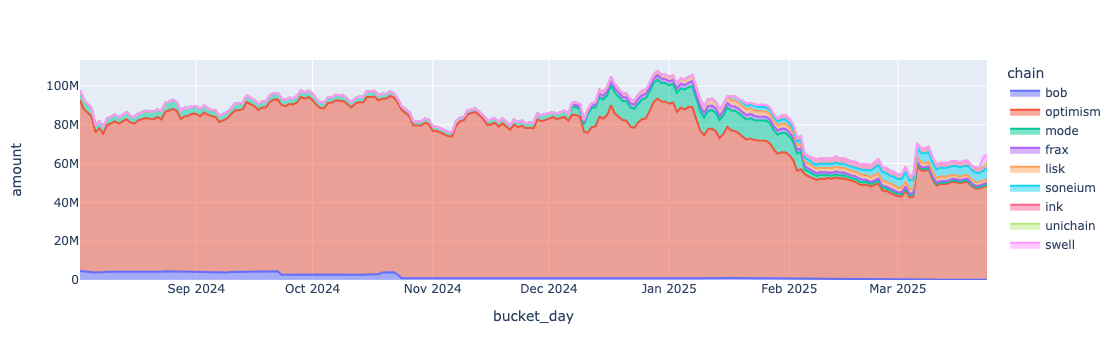

In [7]:
df_events = client.to_pandas("""
select
    bucket_day,
    from_artifact_namespace as chain,
    sum(amount) as amount
from int_events_daily__defillama_tvl
where
    project_id = '5/9fRbVoDF7pHwBdiMbNUbKhidEt/12Ojt9f8cWoZnQ='
    and bucket_day > DATE('2024-08-01')
group by 1,2
order by 1
""")
px.area(df_events, x='bucket_day', y='amount', color='chain')

In [18]:
metrics = [
    f"{c.upper()}_{m}"
    for c in [  # Supported chains
        'base', 'bob', 'frax', 'ink', 'kroma', 'lisk', 'lyra',
        'metal', 'mint', 'mode', 'optimism', 'orderly', 'polynomial',
        'race', 'redstone', 'shape', 'soneium', 'swan', 'swell',
        'unichain', 'worldchain', 'xterio', 'zora'
    ]
    for m in [  # Metric types
        'defillama_tvl_daily'
    ]
]
        
df_metrics = client.to_pandas(f"""
select
    tm.sample_date as bucket_day,
    m.metric_name as chain,
    tm.metric_id,
    tm.amount
from oso.timeseries_metrics_by_project_v0 tm
join oso.projects_v1 p on tm.project_id = p.project_id
join oso.metrics_v0 m on tm.metric_id = m.metric_id
where
    tm.project_id = '5/9fRbVoDF7pHwBdiMbNUbKhidEt/12Ojt9f8cWoZnQ='
    and tm.sample_date > DATE('2024-08-01')
    and m.metric_name in ({"'" + "','".join(metrics) + "'"})
order by 1
""")

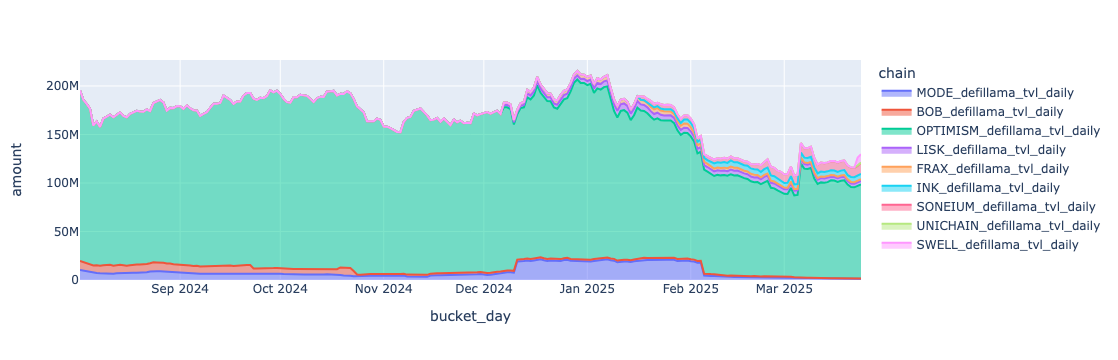

In [19]:
px.area(df_metrics, x='bucket_day', y='amount', color='chain')

In [25]:
client.to_pandas("""
select
    bucket_day,
    to_artifact_name,
    from_artifact_namespace,
    amount,
    to_artifact_id,
    from_artifact_id
from int_events_daily__defillama_tvl
where
    project_id = '5/9fRbVoDF7pHwBdiMbNUbKhidEt/12Ojt9f8cWoZnQ='
    and bucket_day = DATE('2025-02-01')
order by 4 desc
limit 1
""")

,bucket_day,to_artifact_name,from_artifact_namespace,amount,to_artifact_id,from_artifact_id
0,2025-02-01 00:00:00.000,velodrome-v2,optimism,62060042.28637,zhSeS7MIIwFr50OFATGSuvQQW3fiw6PZ1b7Q9WDVsrU=,IqevVoEg62ovtTt/ge0JOTQou5r1A2EcjAQ6ACuiEu0=


In [24]:
client.to_pandas("""
select *
from oso.timeseries_metrics_by_artifact_v0
where 
    artifact_id = 'zhSeS7MIIwFr50OFATGSuvQQW3fiw6PZ1b7Q9WDVsrU='
    and metric_id = 'qlmqaIagTHAic/MX57vOmSprhncNDLYghKF0dM9+m3w='
    and sample_date = DATE('2025-02-01')
order by 4 desc
""")

,metric_id,artifact_id,sample_date,amount,unit
0,qlmqaIagTHAic/MX57vOmSprhncNDLYghKF0dM9+m3w=,zhSeS7MIIwFr50OFATGSuvQQW3fiw6PZ1b7Q9WDVsrU=,2025-02-01,124120084.57274,None


In [20]:
df_metrics

,bucket_day,chain,metric_id,amount
0,2024-08-02,MODE_defillama_tvl_daily,ndFsC8I6H09EX6VAYQ59iKF4oaCTOkylu08tqVI+6gY=,10260039.66534
1,2024-08-02,BOB_defillama_tvl_daily,Myz6ifp4t62tT3uXov0qe5eOSYX4pasxjUzOzDyxvwk=,9341760.79414
2,2024-08-02,OPTIMISM_defillama_tvl_daily,qlmqaIagTHAic/MX57vOmSprhncNDLYghKF0dM9+m3w=,175918828.59932
3,2024-08-03,OPTIMISM_defillama_tvl_daily,qlmqaIagTHAic/MX57vOmSprhncNDLYghKF0dM9+m3w=,167215162.72164
4,2024-08-03,MODE_defillama_tvl_daily,ndFsC8I6H09EX6VAYQ59iKF4oaCTOkylu08tqVI+6gY=,9589590.45392
...,...,...,...,...
1071,2025-03-24,INK_defillama_tvl_daily,PTkbAgVzNKiRx2stgyLeWaq5KGxrhwwBmfOCN5YmP1o=,5261207.23434
1072,2025-03-24,SONEIUM_defillama_tvl_daily,5cxOotfRvkVUHBXfoGxyQiGuqrhGAox3TuNfKI3/OMQ=,11353303.66304
1073,2025-03-24,FRAX_defillama_tvl_daily,5+SjFSEgi1CurNH1pVdGEXLbXuTTSXj6w17ma8w/qlE=,1809314.5927
1074,2025-03-24,LISK_defillama_tvl_daily,dpw811b5/55RV9CZfnpkGSdLlOP1hdp0OF952XVUTWU=,3717991.42494
